In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Dataset](#section_dataset)

[Imports](#section_imports)

[`kdeplot`](#section_kdeplot)

[`jointplot`](#section_jointplot)

[`pairplot`](#section_pairplot)

[`FacetGrid`](#section_facetgrid)

[`catplot`](#section_catplot)

[Ejercicio](#section_ejercicio)

[Referencias](#section_referencias)


<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)
    
La idea principal de Seaborn es proporcionar comandos de más alto nivel que matplotlib para crear una variedad de tipos de gráficos útiles para la exploración de datos estadísticos.

Veremos a continuación algunos de los datasets y tipos de gráficos disponibles en Seaborn. 

Los gráficos que veremos a continuación también pueden construirse con métodos de Matplotlib (esto es lo que hace Seaborn por detrás), pero la API Seaborn es mucho más amigable.

https://seaborn.pydata.org/

<a id="section_dataset"></a> 
## Dataset

[volver a TOC](#section_toc)

En los ejemplos siguientes vamos a usar alguno de estos datasets:

* Datos generados de distribución normal multivariada

* En dataset tips disponible en la biblioteca seaborn, que tiene datos de propinas en un restaurante

https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

* El dataset planets disponible en la biblioteca seaborn, que tiene datos sobre el descubrimiento de planetas

https://github.com/mwaskom/seaborn-data/blob/master/planets.csv


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

data_tips = sns.load_dataset('tips')
#data_tips.head()

data_planets = sns.load_dataset('planets')
data_planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<a id="section_imports"></a> 
## Imports
[volver a TOC](#section_toc)


In [3]:
import seaborn as sns

<a id="section_kdeplot"></a> 
## `kdeplot`
[volver a TOC](#section_toc)

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Como alternativa a los histogramas de matplotlib, podemos obtener una estimación uniforme de la distribución utilizando una estimación de densidad kernel, Seaborn lo resuelve con `sns.kdeplot`:

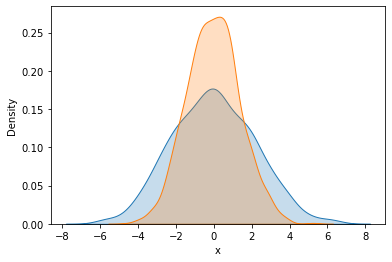

In [4]:
for col in data.columns:
    sns.kdeplot(data[col], shade=True)

Podemos combinar histogramas y kdeplot con el método `sns.distplot`:

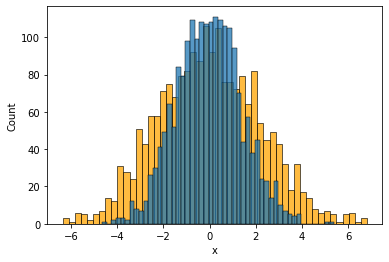

In [15]:
sns.histplot(data['x'], color = "orange", bins = 50)
sns.histplot(data['y'], bins = 50);

`sns.kdeplot` y `sns.histplot` reciben como parámetro un set de datos unidimensional.

<a id="section_jointplot"></a> 
## `jointplot`
[volver a TOC](#section_toc)

https://seaborn.pydata.org/generated/seaborn.jointplot.html

Podemos ver la distribución conjunta junto a las distribuciones marginales usando `sns.jointplot`.

Graficaremos la densidad kernel de los datos, estableciendo el valor del argumento kind en kde.

`sns.jointplot` recibe como parámetros los datos a graficar en los ejes x e y, ó los nombres de las columnas del dataset y el dataset cuyas columnas serán representadas en los ejes x e y

Para este gráfico, estableceremos el estilo de fondo blanco:

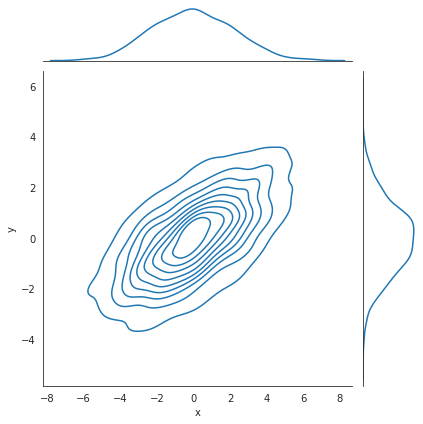

In [6]:
with sns.axes_style('white'):
    sns.jointplot(x = "x", y = "y", data = data, kind='kde');

Otra alternativa:

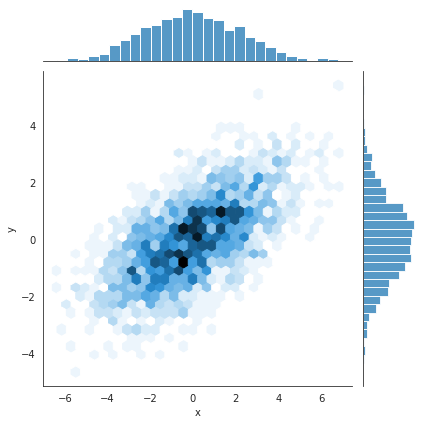

In [7]:
with sns.axes_style('white'):
    sns.jointplot(x = "x", y = "y", data = data, kind='hex')

<a id="section_pairplot"></a> 
## `pairplot`
[volver a TOC](#section_toc)

https://seaborn.pydata.org/generated/seaborn.pairplot.html

Estos gráficos son muy útiles para explorar correlaciones entre datos multidimensionales, graficando todos los pares de valores entre sí.


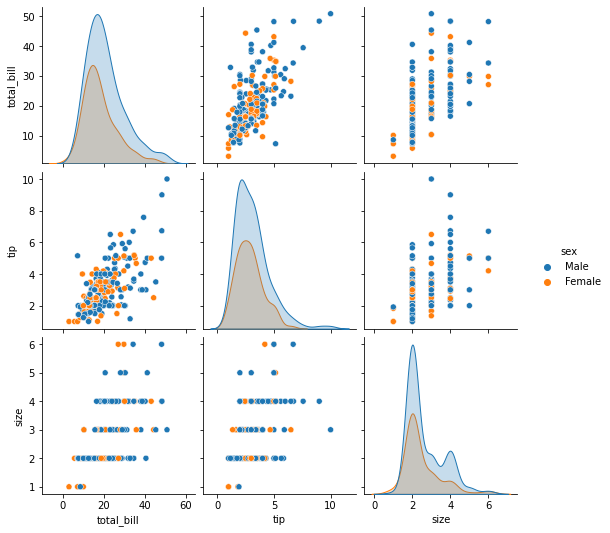

In [8]:
sns.pairplot(data_tips, hue='sex', height=2.5);

<a id="section_facetgrid"></a> 
## `FacetGrid`
[volver a TOC](#section_toc)

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

A veces, la mejor manera de ver datos es a través de histogramas por subconjuntos.

Veremos en este ejemplo el monto de propinas que recibe el personal de un restaurante basado en distintos indicadores.

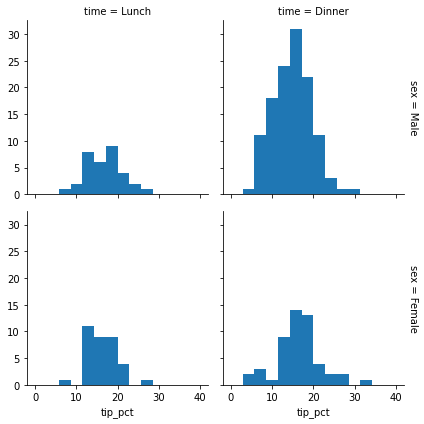

In [9]:
import matplotlib.pyplot as plt

# calculamos que porcentaje de la cuenta representa la propina: 
data_tips['tip_pct'] = 100 * data_tips['tip'] / data_tips['total_bill']

# creamos la grilla vacía
grid = sns.FacetGrid(data_tips, row="sex", col="time", margin_titles=True)

# graficamos cada uno de los histogramas que corresponden a los elementos de la grilla:
# nota: plt.hist es el método de matplotlib
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

<a id="section_catplot"></a> 
## `catplot`
[volver a TOC](#section_toc)

https://seaborn.pydata.org/generated/seaborn.catplot.html

Estos gráficos nos permiten ver la distribución de una variable numérica dentro de las categorías definidas por cualquier otro parámetro.

`catplot` define una familia de gráficos, el valor especificado en el parámetro `kind` define de qué tipo es el gráfico construido.

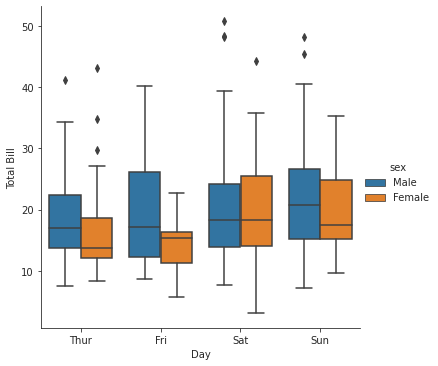

In [10]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "day", y = "total_bill", hue="sex", data=data_tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

Usemos `catplot` para generar un gráfico de barras:

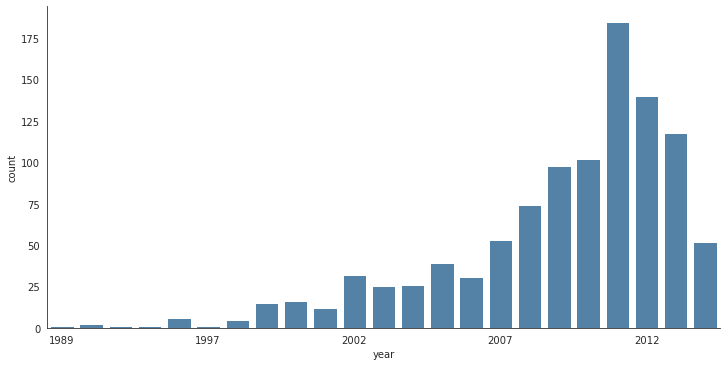

In [11]:
with sns.axes_style('white'):
    g = sns.catplot(x = "year", data=data_planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

Miremos ahora la columna *method* de descubrimiento de cada uno de los planetas

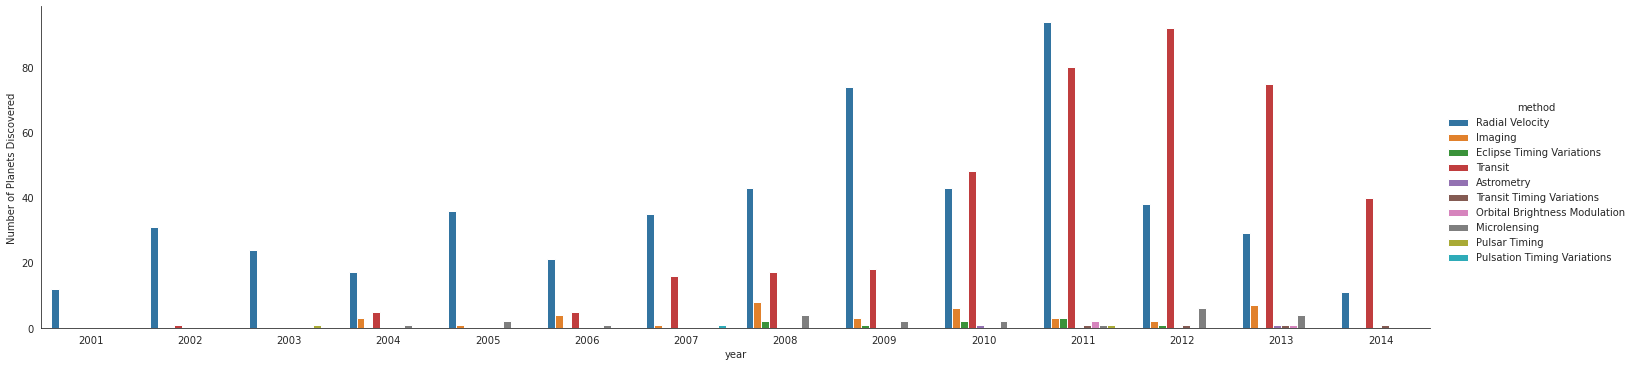

In [12]:
with sns.axes_style('white'):
    g = sns.catplot(x = "year", data=data_planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

---
<a id="section_ejercicio"></a> 
#### Ejercicio
[volver a TOC](#section_toc)

Usando algún dataset de los que analizamos hasta el momento, elijamos tres columnas e intentemos extraer conclusiones sobre los datos o sus relaciones usando visualizaciones creadas con seaborn.

Si son los mismos datos y las mismas columnas que en la práctica guiada de matplotlib, elijan visualizaciones distintas a las que usaron en el análisis anterior.

Si les interesa usar otro dataset que no hayamos usado, también pueden hacerlo.


---

<a id="section_referencias"></a> 
#### Referencias
[volver a TOC](#section_toc)

Python Data Science Handbook. Jake VanderPlas. 2017. Capítulo 4.

Código del libro (puede ejecutarse en Colab) https://github.com/jakevdp/PythonDataScienceHandbook

Tutorial 
http://seaborn.pydata.org/tutorial.html

Ejemplos de código
https://seaborn.pydata.org/examples/index.html
